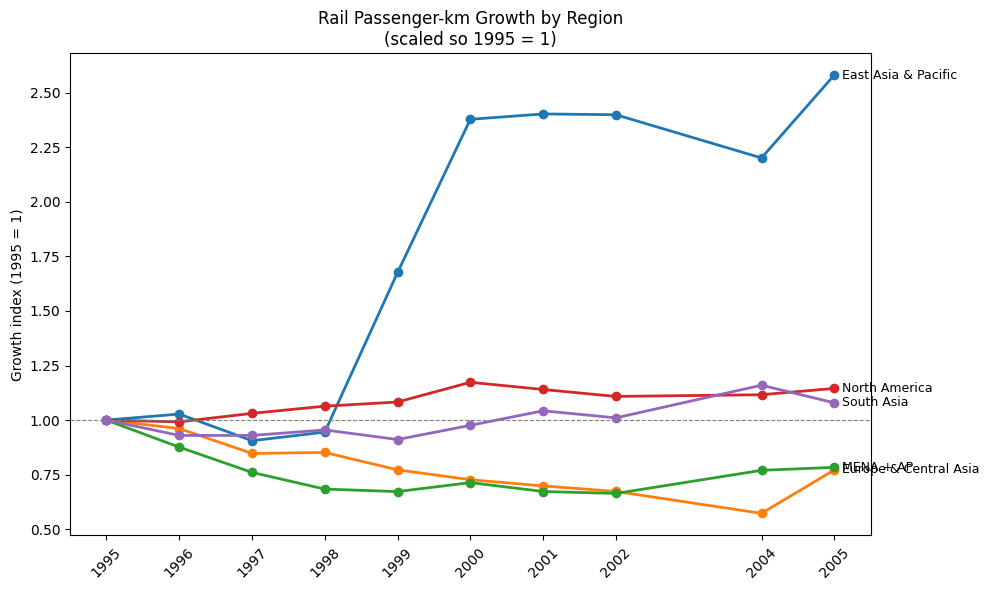

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("railways-passengers-carried-passenger-km.csv")
pkm_col = "Railways, passengers carried (million passenger-km)"

regions = [
    "East Asia and Pacific (WB)",
    "Europe and Central Asia (WB)",
    "Middle East, North Africa, Afghanistan and Pakistan (WB)",
    "North America (WB)",
    "South Asia (WB)",
]

short_name = {
    "East Asia and Pacific (WB)": "East Asia & Pacific",
    "Europe and Central Asia (WB)": "Europe & Central Asia",
    "Middle East, North Africa, Afghanistan and Pakistan (WB)": "MENA + AP",
    "North America (WB)": "North America",
    "South Asia (WB)": "South Asia",
}

region_df = df[df["Entity"].isin(regions)].copy()

# -----------------------------
# 2. Find years common to ALL regions
# -----------------------------
year_sets = {
    r: set(region_df[region_df["Entity"] == r]["Year"])
    for r in regions
}

common_years = sorted(list(reduce(set.intersection, year_sets.values())))
# If you want, you can limit to a more recent range here

# -----------------------------
# 3. Build pivot table and growth index
# -----------------------------
common_df = region_df[region_df["Year"].isin(common_years)]

pivot = common_df.pivot(index="Year", columns="Entity", values=pkm_col)
pivot = pivot[regions]  # keep consistent order

# Normalize so first common year = 1 for each region
base_year = common_years[0]
base_values = pivot.loc[base_year]
growth_index = pivot.div(base_values, axis=1)

# -----------------------------
# 4. Plot “multi-year slopegraph”
# -----------------------------
plt.figure(figsize=(10, 6))
ax = plt.gca()

for region in regions:
    ax.plot(
        common_years,
        growth_index[region],
        marker="o",
        linewidth=2,
        label=short_name[region],
    )
    # Label only the last point for each line
    last_year = common_years[-1]
    last_val = growth_index.loc[last_year, region]
    ax.text(
        last_year + 0.1,
        last_val,
        short_name[region],
        va="center",
        fontsize=9,
    )

# baseline (no growth)
ax.axhline(1.0, color="grey", linestyle="--", linewidth=0.8)

ax.set_xticks(common_years)
ax.set_xticklabels(common_years, rotation=45)
ax.set_ylabel(f"Growth index ({base_year} = 1)")
ax.set_title(
    "Rail Passenger-km Growth by Region\n"
    f"(scaled so {base_year} = 1)"
)



plt.tight_layout()
plt.show()

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. Load data
# ----------------------------------------------------
df = pd.read_csv("modern-renewable-prod.csv")

# Energy columns in the dataset
energy_cols = [
    "Electricity from wind - TWh",
    "Electricity from hydro - TWh",
    "Electricity from solar - TWh",
    "Other renewables including bioenergy - TWh"
]

# Make sure they are numeric
for c in energy_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ----------------------------------------------------
# 2. Filter to real continents (no Ember aggregates)
# ----------------------------------------------------
continents = ["Africa", "Asia", "Europe",
              "North America", "South America", "Oceania"]

cont_df = df[df["Entity"].isin(continents)].copy()

# ----------------------------------------------------
# 3. Build stacked area plots per continent
# ----------------------------------------------------
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, cont in zip(axes, continents):
    sub = cont_df[cont_df["Entity"] == cont].sort_values("Year")

    years = sub["Year"].values
    wind  = sub["Electricity from wind - TWh"].fillna(0).values
    hydro = sub["Electricity from hydro - TWh"].fillna(0).values
    solar = sub["Electricity from solar - TWh"].fillna(0).values
    bio   = sub["Other renewables including bioenergy - TWh"].fillna(0).values

    ax.stackplot(
        years,
        wind, hydro, solar, bio,
        labels=["Wind", "Hydro", "Solar", "Bioenergy/Other"]
    )
    ax.set_title(cont)
    ax.grid(True, alpha=0.3)

# Common X/Y labels
fig.text(0.5, 0.04, "Year", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Renewable electricity (TWh)", va="center",
         rotation="vertical", fontsize=12)

# One shared legend at the top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, frameon=False)

plt.suptitle("Renewable Electricity Production by Continent (Stacked Area)", y=0.98, fontsize=14)
plt.tight_layout(rect=[0.03, 0.06, 1, 0.94])
plt.show()
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
    self.io_loop.start()
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
    self._run_once()
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
    handle._run()
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
    await self.process_one()
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
    await dispatch(*args)
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
    await result
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
    reply_content = await reply_content
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
    result = self._run_cell(
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
    return runner(coro)
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/nc/hj5s37qs1jzdqnf7_whfkn7m0000gn/T/ipykernel_48395/1591855791.py", line 2, in <cell line: 2>
    import matplotlib.pyplot as plt
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/__init__.py", line 109, in <module>
    from . import _api, _version, cbook, docstring, rcsetup
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/rcsetup.py", line 27, in <module>
    from matplotlib.colors import Colormap, is_color_like
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py", line 56, in <module>
    from matplotlib import _api, cbook, scale
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/scale.py", line 23, in <module>
    from matplotlib.ticker import (
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/ticker.py", line 136, in <module>
    from matplotlib import transforms as mtransforms
  File "/Users/theegalanitin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py", line 46, in <module>
    from matplotlib._path import (
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
AttributeError: _ARRAY_API not found
---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
Input In [2], in <cell line: 2>()
      1 import pandas as pd
----> 2 import matplotlib.pyplot as plt
      4 # ----------------------------------------------------
      5 # 1. Load data
      6 # ----------------------------------------------------
      7 df = pd.read_csv("modern-renewable-prod.csv")

File ~/opt/anaconda3/lib/python3.9/site-packages/matplotlib/__init__.py:109, in <module>
    105 from packaging.version import parse as parse_version
    107 # cbook must import matplotlib only within function
    108 # definitions, so it is safe to import from it here.
--> 109 from . import _api, _version, cbook, docstring, rcsetup
    110 from matplotlib.cbook import MatplotlibDeprecationWarning, sanitize_sequence
    111 from matplotlib.cbook import mplDeprecation  # deprecated

File ~/opt/anaconda3/lib/python3.9/site-packages/matplotlib/rcsetup.py:27, in <module>
     25 from matplotlib import _api, cbook
     26 from matplotlib.cbook import ls_mapper
---> 27 from matplotlib.colors import Colormap, is_color_like
     28 from matplotlib.fontconfig_pattern import parse_fontconfig_pattern
     29 from matplotlib._enums import JoinStyle, CapStyle

File ~/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:56, in <module>
     54 import matplotlib as mpl
     55 import numpy as np
---> 56 from matplotlib import _api, cbook, scale
     57 from ._color_data import BASE_COLORS, TABLEAU_COLORS, CSS4_COLORS, XKCD_COLORS
     60 class _ColorMapping(dict):

File ~/opt/anaconda3/lib/python3.9/site-packages/matplotlib/scale.py:23, in <module>
     21 import matplotlib as mpl
     22 from matplotlib import _api, docstring
---> 23 from matplotlib.ticker import (
     24     NullFormatter, ScalarFormatter, LogFormatterSciNotation, LogitFormatter,
     25     NullLocator, LogLocator, AutoLocator, AutoMinorLocator,
     26     SymmetricalLogLocator, LogitLocator)
     27 from matplotlib.transforms import Transform, IdentityTransform
     30 class ScaleBase:

File ~/opt/anaconda3/lib/python3.9/site-packages/matplotlib/ticker.py:136, in <module>
    134 import matplotlib as mpl
    135 from matplotlib import _api, cbook
--> 136 from matplotlib import transforms as mtransforms
    138 _log = logging.getLogger(__name__)
    140 __all__ = ('TickHelper', 'Formatter', 'FixedFormatter',
    141            'NullFormatter', 'FuncFormatter', 'FormatStrFormatter',
    142            'StrMethodFormatter', 'ScalarFormatter', 'LogFormatter',
   (...)
    148            'MultipleLocator', 'MaxNLocator', 'AutoMinorLocator',
    149            'SymmetricalLogLocator', 'LogitLocator')

File ~/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:46, in <module>
     43 from numpy.linalg import inv
     45 from matplotlib import _api
---> 46 from matplotlib._path import (
     47     affine_transform, count_bboxes_overlapping_bbox, update_path_extents)
     48 from .path import Path
     50 DEBUG = False

ImportError: numpy.core.multiarray failed to import
import pandas as pd
import plotly.express as px

# ----------------------------------------------------
# 1. Load data
# ----------------------------------------------------
# Change the path if needed
df = pd.read_csv("modern-renewable-prod.csv")

energy_cols = [
    "Electricity from wind - TWh",
    "Electricity from hydro - TWh",
    "Electricity from solar - TWh",
    "Other renewables including bioenergy - TWh",
]

# Ensure numeric
for c in energy_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ----------------------------------------------------
# 2. Keep only true continents (no Ember data)
# ----------------------------------------------------
continents = ["Africa", "Asia", "Europe",
              "North America", "South America", "Oceania"]

cont_df = df[df["Entity"].isin(continents)].copy()

# ----------------------------------------------------
# 3. Wide → long format for Plotly
# ----------------------------------------------------
long = cont_df.melt(
    id_vars=["Entity", "Year"],
    value_vars=energy_cols,
    var_name="Source",
    value_name="TWh"
)

# Clean source labels
long["Source"] = (
    long["Source"]
    .str.replace("Electricity from ", "", regex=False)
    .str.replace(" - TWh", "", regex=False)
    .str.replace("Other renewables including bioenergy", "Bioenergy / Other", regex=False)
)

# Drop years with all-NaN for a continent
long = long.dropna(subset=["TWh"])

# ----------------------------------------------------
# 4. Interactive stacked area with tooltips
# ----------------------------------------------------
fig = px.area(
    long,
    x="Year",
    y="TWh",
    color="Source",
    facet_col="Entity",
    facet_col_wrap=3,
    title="Renewable Electricity Production by Continent (Stacked Area)",
    hover_data={
        "Year": True,
        "Source": True,
        "TWh": ":.1f",
        "Entity": False,   # it's already in the facet title
    }
)

fig.update_layout(
    height=700,
    legend_title_text="Renewable source",
    margin=dict(l=40, r=10, t=60, b=40),
)

# Optional: nicer facet titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()


SyntaxError: invalid decimal literal (ipython-input-2332929280.py, line 64)

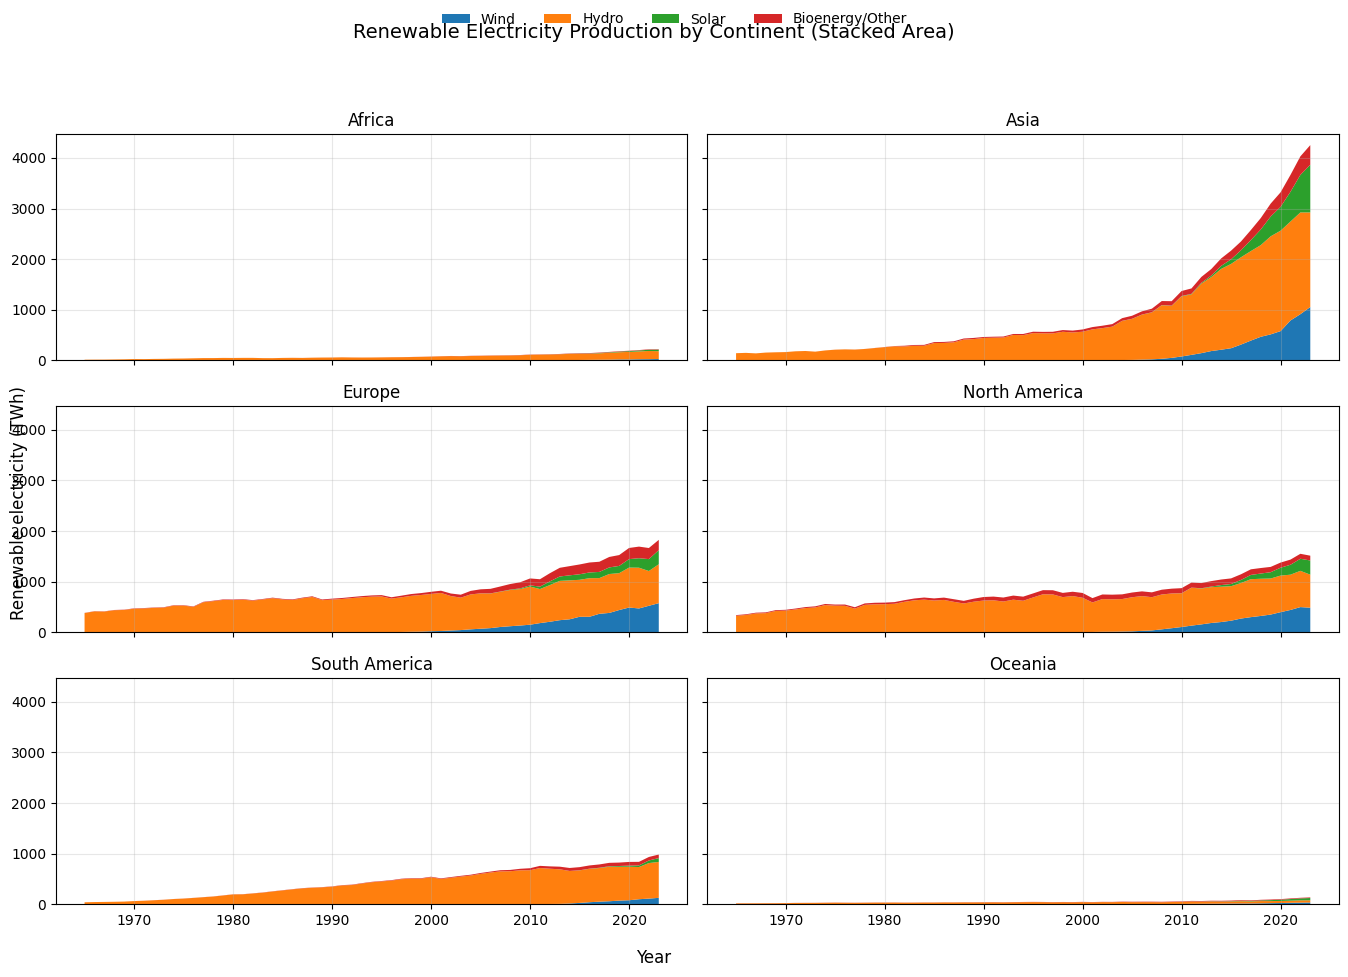

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. Load data
# ----------------------------------------------------
df = pd.read_csv("modern-renewable-prod.csv")

# Energy columns in the dataset
energy_cols = [
    "Electricity from wind - TWh",
    "Electricity from hydro - TWh",
    "Electricity from solar - TWh",
    "Other renewables including bioenergy - TWh"
]

# Make sure they are numeric
for c in energy_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ----------------------------------------------------
# 2. Filter to real continents (no Ember aggregates)
# ----------------------------------------------------
continents = ["Africa", "Asia", "Europe",
              "North America", "South America", "Oceania"]

cont_df = df[df["Entity"].isin(continents)].copy()

# ----------------------------------------------------
# 3. Build stacked area plots per continent
# ----------------------------------------------------
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, cont in zip(axes, continents):
    sub = cont_df[cont_df["Entity"] == cont].sort_values("Year")

    years = sub["Year"].values
    wind  = sub["Electricity from wind - TWh"].fillna(0).values
    hydro = sub["Electricity from hydro - TWh"].fillna(0).values
    solar = sub["Electricity from solar - TWh"].fillna(0).values
    bio   = sub["Other renewables including bioenergy - TWh"].fillna(0).values

    ax.stackplot(
        years,
        wind, hydro, solar, bio,
        labels=["Wind", "Hydro", "Solar", "Bioenergy/Other"]
    )
    ax.set_title(cont)
    ax.grid(True, alpha=0.3)

# Common X/Y labels
fig.text(0.5, 0.04, "Year", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Renewable electricity (TWh)", va="center",
         rotation="vertical", fontsize=12)

# One shared legend at the top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, frameon=False)

plt.suptitle("Renewable Electricity Production by Continent (Stacked Area)", y=0.98, fontsize=14)
plt.tight_layout(rect=[0.03, 0.06, 1, 0.94])
plt.show()

In [5]:
import pandas as pd
import plotly.express as px

# ----------------------------------------------------
# 1. Load data
# ----------------------------------------------------
# Change the path if needed
df = pd.read_csv("modern-renewable-prod.csv")

energy_cols = [
    "Electricity from wind - TWh",
    "Electricity from hydro - TWh",
    "Electricity from solar - TWh",
    "Other renewables including bioenergy - TWh",
]

# Ensure numeric
for c in energy_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ----------------------------------------------------
# 2. Keep only true continents (no Ember data)
# ----------------------------------------------------
continents = ["Africa", "Asia", "Europe",
              "North America", "South America", "Oceania"]

cont_df = df[df["Entity"].isin(continents)].copy()

# ----------------------------------------------------
# 3. Wide → long format for Plotly
# ----------------------------------------------------
long = cont_df.melt(
    id_vars=["Entity", "Year"],
    value_vars=energy_cols,
    var_name="Source",
    value_name="TWh"
)

# Clean source labels
long["Source"] = (
    long["Source"]
    .str.replace("Electricity from ", "", regex=False)
    .str.replace(" - TWh", "", regex=False)
    .str.replace("Other renewables including bioenergy", "Bioenergy / Other", regex=False)
)

# Drop years with all-NaN for a continent
long = long.dropna(subset=["TWh"])

# ----------------------------------------------------
# 4. Interactive stacked area with tooltips
# ----------------------------------------------------
fig = px.area(
    long,
    x="Year",
    y="TWh",
    color="Source",
    facet_col="Entity",
    facet_col_wrap=3,
    title="Renewable Electricity Production by Continent (Stacked Area)",
    hover_data={
        "Year": True,
        "Source": True,
        "TWh": ":.1f",
        "Entity": False,   # it's already in the facet title
    }
)

fig.update_layout(
    height=700,
    legend_title_text="Renewable source",
    margin=dict(l=40, r=10, t=60, b=40),
)

# Optional: nicer facet titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()